# Module import

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import re
#from official.nlp import 
import bert
import tensorflow_hub as hub
import math
from tensorflow.keras import layers
import random
import os
from urllib import request
import bert
from textblob import TextBlob
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
#from tensorflow.keras.losses import softmax_cross_entropy_with_logits
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from transformers import TFBertModel,  BertConfig, BertTokenizerFast
import nltk
nltk.download("popular")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [4]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [5]:
from dont_patronize_me import DontPatronizeMe
# Initialize a dpm (Don't Patronize Me) object.
# It takes two areguments as input: 
# (1) Path to the training set, which is the root directory of this notebook.
# (2) Path to the test set, which will be released when the evaluation phase begins. 
# For now, you can just use the dataset for Subtask 1, which the code will load without labels.
dpm = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')

In [6]:
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
dpm.train_task1_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,@@23953477,in-need,in,The ones in need of constant medical care are ...,0,0,0
1,@@4703096,immigrant,jm,NBC and Spanish-language Univision both declin...,0,0,0
2,@@25567226,in-need,hk,A second T-Home project is being launched in t...,0,0,0
3,@@1824078,poor-families,tz,Camfed would like to see this trend reversed ....,4,1,4
4,@@1921089,refugee,tz,Kagunga village was reported to lack necessary...,0,0,0


In [7]:
data=dpm.train_task1_df

In [9]:
data['country']

0        The ones in need of constant medical care are ...
1        NBC and Spanish-language Univision both declin...
2        A second T-Home project is being launched in t...
3        Camfed would like to see this trend reversed ....
4        Kagunga village was reported to lack necessary...
                               ...                        
10631    To me , I am always mindful that we are dealin...
10632    Other themes included promoting the inclusion ...
10633    It came as the CDU was also humiliated by the ...
10634    Those were only days of helplessness , she say...
10635    They include a community college student , a c...
Name: country, Length: 10636, dtype: object

# Wordcloud data creation

'kagunga village was reported to lack necessary social services to meet the growing demand of refugees the village has neither reliable clean and safe water nor sanitation facilities that include latrines and critical medical services'

In [16]:
y=data['label']

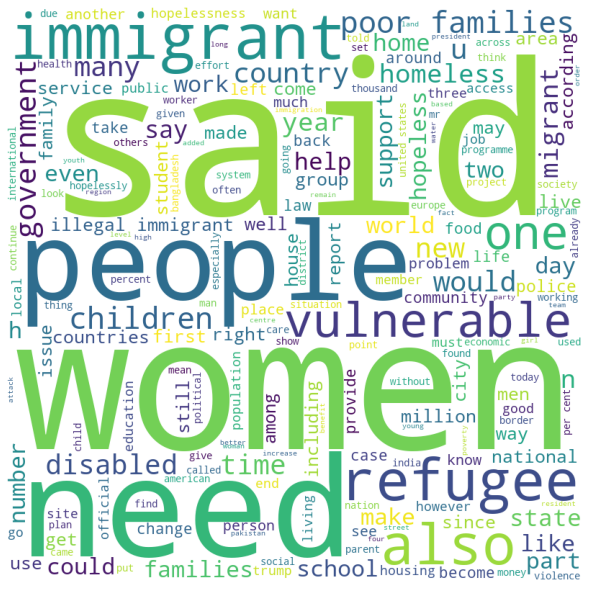

In [46]:
import matplotlib.pyplot as plt
import wordcloud

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['country'][i])
    review = review.lower()
    review = review.split()
    
    #review = [ps.stem(word) for word in revie`w if not word in stopwords.words('english')]
    review = ' '.join(review)
    #if review not in stop_words and not = 's':
    #print(review)
    corpus.append(review)
corpus[4]


unreliables=[]
reliables = []
for i in range(len(corpus)):
    if bool(y[i])==bool(1):
        unreliables.append(corpus[i])
    else:
        reliables.append(corpus[i])

        
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
for words in reliables: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10,stopwords=stop_words).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("nonPatronizing.png")
plt.show() 

In [53]:
len(reliables)

9634

In [54]:
len(unreliables)

1002

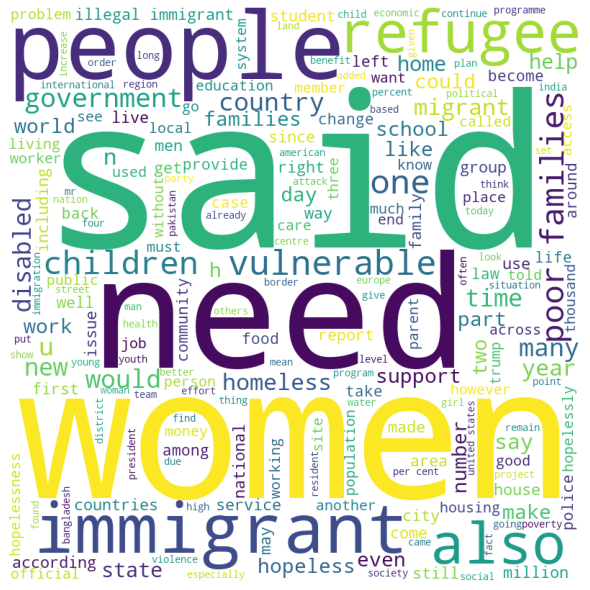

In [41]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
for words in reliables: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10,stopwords=stop_words).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("nonPatronizing.png")
plt.show() 

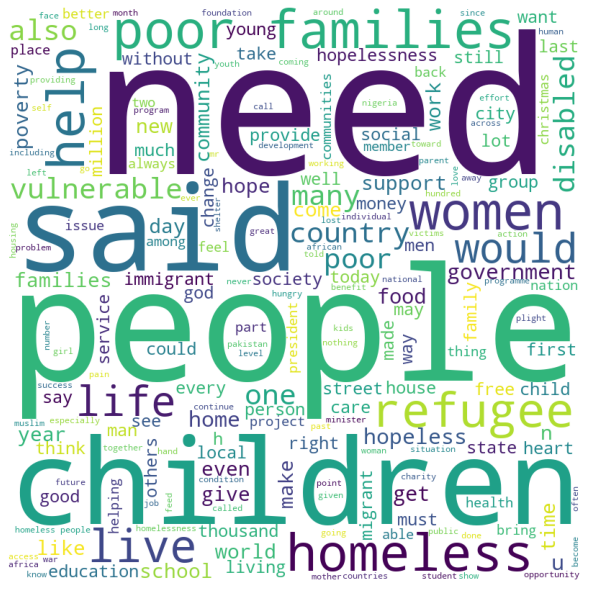

In [43]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
for words in unreliables: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10,stopwords=stop_words).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("patronizing.png")
plt.show() 

In [90]:
from collections import Counter
list1 = [words for segments in unreliables for words in segments.split()]

#print(counts)
unreliables_without_sw = [word for word in list1 if not word in stopwords.words()]
counts = Counter(unreliables_without_sw)
sorted_unreliables = sorted(counts.items(), key=lambda item: item[1], reverse=True)
sorted_unreliables

KeyboardInterrupt: 

In [91]:
sorted_unreliables

[('people', 260),
 ('need', 238),
 ('poor', 234),
 ('families', 211),
 ('children', 200),
 ('said', 197),
 ('homeless', 178),
 ('women', 147),
 ('help', 136),
 ('disabled', 106),
 ('life', 99),
 ('vulnerable', 98),
 ('refugees', 96),
 ('many', 93),
 ('would', 90),
 ('country', 86),
 ('hopeless', 79),
 ('us', 79),
 ('government', 78),
 ('food', 74),
 ('get', 70),
 ('world', 69),
 ('lives', 69),
 ('work', 65),
 ('hope', 64),
 ('poverty', 63),
 ('even', 62),
 ('new', 61),
 ('give', 59),
 ('community', 59),
 ('time', 58),
 ('year', 58),
 ('like', 57),
 ('day', 57),
 ('education', 54),
 ('hopelessness', 54),
 ('make', 54),
 ('society', 53),
 ('every', 52),
 ('support', 51),
 ('home', 51),
 ('see', 50),
 ('young', 48),
 ('way', 47),
 ('much', 46),
 ('living', 46),
 ('immigrants', 44),
 ('could', 43),
 ('others', 43),
 ('family', 43),
 ('live', 42),
 ('years', 42),
 ('school', 41),
 ('well', 40),
 ('health', 40),
 ('social', 39),
 ('last', 38),
 ('good', 37),
 ('may', 36),
 ('must', 36),
 ('g

In [82]:
from collections import Counter
list1 = [words for segments in reliables for words in segments.split()]
counts = Counter(list1)
#print(counts)
counts_without_sw = [word for word in counts if not word in stopwords.words()]

sorted(counts_without_sw.items(), key=lambda item: item[1], reverse=True)

In [27]:
import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

# Exploratory data analysis

In [22]:
data.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,@@23953477,in-need,in,The ones in need of constant medical care are ...,0,0,0
1,@@4703096,immigrant,jm,NBC and Spanish-language Univision both declin...,0,0,0
2,@@25567226,in-need,hk,A second T-Home project is being launched in t...,0,0,0
3,@@1824078,poor-families,tz,Camfed would like to see this trend reversed ....,4,1,4
4,@@1921089,refugee,tz,Kagunga village was reported to lack necessary...,0,0,0


In [30]:
len(data)

10636

In [57]:
df = data.drop('par_id', 1)
df = df.drop('art_id',1)
df = df.drop('keyword',1)
df = df.drop('text',1)
#df = data.drop('article_id', 1)
df = df.rename(columns={'country': 'paragraph'})
#again this needs to be fixed but atm it removed the first column

In [42]:
#df = df.drop('paragraph.1',1)

In [37]:
df.head()

,paragraph,label,orig_label
0,The ones in need of constant medical care are ...,0,0
1,NBC and Spanish-language Univision both declin...,0,0
2,A second T-Home project is being launched in t...,0,0
3,Camfed would like to see this trend reversed ....,1,4
4,Kagunga village was reported to lack necessary...,0,0


In [33]:
df=df.dropna()

In [34]:
len(df)

10636

In [23]:
data.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,@@23953477,in-need,in,The ones in need of constant medical care are ...,0,0,0
1,@@4703096,immigrant,jm,NBC and Spanish-language Univision both declin...,0,0,0
2,@@25567226,in-need,hk,A second T-Home project is being launched in t...,0,0,0
3,@@1824078,poor-families,tz,Camfed would like to see this trend reversed ....,4,1,4
4,@@1921089,refugee,tz,Kagunga village was reported to lack necessary...,0,0,0


In [24]:
df2=data

In [25]:
#df2=df2.drop("country",1)
df2=df2.drop("art_id",1)
df2=df2.drop("par_id",1)
df2=df2.drop("keyword",1)
df2=df2.drop("text",1)
df2=df2.drop("orig_label",1)
df2 = df2.rename(columns={'country': 'paragraph'})

Once the reviews are sorted we will convert thed dataset so that it can be used to train TensorFlow 2.0 models. Run the following code to convert the sorted dataset into a TensorFlow 2.0-compliant input dataset shape.


In [39]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))


Finally, we can now pad our dataset for each batch. The batch size we are going to use is 32 which means that after processing 32 reviews, the weights of the neural network will be updated. To pad the reviews locally with respect to batches, execute the following:

In [40]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [41]:
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 5), dtype=int32, numpy=
 array([[    0,     0,     0,     0,     0],
        [ 8711,     0,     0,     0,     0],
        [ 3110, 20625,     0,     0,     0],
        [ 7074,  8556,  8711,     0,     0],
        [ 9042, 13141,  2336,     0,     0],
        [ 1996, 10275, 11560,     0,     0],
        [ 3492,  2172, 20625,     0,     0],
        [ 2040,  2003, 13141,     0,     0],
        [ 3319, 13141,  2375,     0,     0],
        [ 2454,  2000,  1996,  9776,     0],
        [ 2009,  2074,  3849, 20625,     0],
        [ 3579,  2006,  1996, 11573,     0],
        [ 6951,  7126,  5700,  8711,     0],
        [ 2885,  5391, 16836, 19549,     0],
        [ 3554,  2058,  2273,  2308,     0],
        [ 8738,  2005,  2308,  2058,     0],
        [16836, 19549,  2125,  4977,     0],
        [ 2028,  2111,  2035,  7489,     0],
        [ 3577, 26001, 16836,  1999,  7095],
        [ 3361,  5375,  2000,  3532,  2945],
        [20148,  3727,  2695,  2386, 11573],
       

#### seperate training and testing data - bit of a mad way to do it lol

In [44]:
TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

### creating model 

this is taken from [here](https://colab.research.google.com/drive/12noBxRkrZnIkHqvmdfFW2TGdOXFtNePM) . has 3 CNN layers. can also use LSTM layers instead and can also increase or decrease the number of layers (all this taken from the link I've been following [hereee](https://stackabuse.com/text-classification-with-bert-tokenizer-and-tf-2-0-in-python/) .

In [46]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

### values for model hyperparameters

In [47]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2

NB_EPOCHS = 5

not too sure what the craic is here lol

In [50]:
from tensorflow.keras import layers

In [51]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

Before we can actually train the model we need to compile it. The following script compiles the model:

In [52]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [53]:
text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
300/300 [==============================] - 48s 154ms/step - loss: 0.3035 - accuracy: 0.9053
Epoch 2/5
300/300 [==============================] - 46s 153ms/step - loss: 0.1659 - accuracy: 0.9358
Epoch 3/5
300/300 [==============================] - 46s 153ms/step - loss: 0.0366 - accuracy: 0.9872
Epoch 4/5
300/300 [==============================] - 46s 152ms/step - loss: 0.0127 - accuracy: 0.9968
Epoch 5/5
300/300 [==============================] - 46s 152ms/step - loss: 0.0083 - accuracy: 0.9975


now to try the trained model on the testing data

In [55]:
results = text_model.evaluate(test_data)
print(results)

33/33 [==============================] - 1s 15ms/step - loss: 1.5106 - accuracy: 0.6335
[1.5106418132781982, 0.6335227489471436]


### room for improvement - 
obvo fix up the code so its not plagiarised and its not for movie reviews.
also try get a few diff models not just CNN
try get it so that it's not just a binary check (e.g. you have the scale from 0 to 4 and not just 0 and 1)
64% accuracy is a bit shit too tbh, especially when only 9% of them are patronizing would be wanting 91%+ for it to be better than random guessing


In [58]:
len(df2[df2["label"]==1])/len(df2)

0.09420834900338473